In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import tensorflow as tf
import random
from random import randint
from random import shuffle
import librosa
import librosa.display
import pickle

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()


In [2]:
ac_sets = ["0.7", "0.8", "0.9"]
ic_sets = ["0.7", "0.8", "0.9"]
tc_sets = ["0.7", "0.8", "0.9"]


def loadData_ThreeModal(ac_per, ic_per, tc_per,printSize=False):
    train_AC = pickle.load(open('data/AC_Training_'+ac_per+'.p', mode='rb'))
    valid_AC = pickle.load(open('data/AC_Validation_'+ac_per+'.p', mode='rb'))

    train_IC = pickle.load(open('data/IC_Training_'+ic_per+'.p', mode='rb'))
    valid_IC = pickle.load(open('data/IC_Validation_'+ic_per+'.p', mode='rb'))
    
    train_TC = pickle.load(open('data/TC_Training_'+tc_per+'.p', mode='rb'))
    valid_TC = pickle.load(open('data/TC_Validation_'+tc_per+'.p', mode='rb'))
    
    if(printSize):
        print("Validation samples",len(valid_AC[0]))
        print("Training samples",len(train_AC[0]))

    
    #Training Set
    trainHolder = []
    for i in range(len(train_AC[0])):
        trainHolder.append([train_AC[0][i],train_IC[0][i],train_TC[0][i],train_AC[1][i]])
    #Validation set
    validHolder = []    
    for i in range(len(valid_AC[0])):
        validHolder.append([valid_AC[0][i],valid_IC[0][i],valid_TC[0][i],valid_AC[1][i]])
    
    return trainHolder, validHolder
        
trainingSet, validationSet = loadData_ThreeModal("0.9","0.9","0.9")

In [3]:
# Check the accuracy of all models
print("Number of samples in training set:",len(trainingSet))
print("Number of samples in validation set:",len(validationSet))
for acc_level in ac_sets:
    trainingSet, validationSet = loadData_ThreeModal(acc_level,acc_level,acc_level)
    print("Level of accuracy:",acc_level)
    t_ac = 0
    t_ic = 0
    t_tc = 0

    for i in range(len(trainingSet)):
        if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][3])):
            t_ac += 1
        if(np.argmax(trainingSet[i][1]) == np.argmax(trainingSet[i][3])):
            t_ic += 1
        if(np.argmax(trainingSet[i][2]) == np.argmax(trainingSet[i][3])):
            t_tc += 1

    print("Training accuracy for")
    print("AC is {:.2f}%".format (t_ac/len(trainingSet)*100))       
    print("IC is {:.2f}%".format (t_ic/len(trainingSet)*100))      
    print("TC is {:.2f}%".format (t_tc/len(trainingSet)*100))

    v_ac = 0
    v_ic = 0
    v_tc = 0

    for i in range(len(validationSet)):
        if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][3])):
            v_ac += 1
        if(np.argmax(validationSet[i][1]) == np.argmax(validationSet[i][3])):
            v_ic += 1
        if(np.argmax(validationSet[i][2]) == np.argmax(validationSet[i][3])):
            v_tc += 1
    

    print("Validation accuracy for")
    print("AC is {:.2f}%".format (v_ac/len(validationSet)*100))
    print("IC is {:.2f}%".format (v_ic/len(validationSet)*100))  
    print("TC is {:.2f}%".format (v_tc/len(validationSet)*100)) 
    print()

Number of samples in training set: 20116
Number of samples in validation set: 3549
Level of accuracy: 0.7
Training accuracy for
AC is 73.17%
IC is 70.83%
TC is 70.10%
Validation accuracy for
AC is 70.95%
IC is 71.46%
TC is 70.84%

Level of accuracy: 0.8
Training accuracy for
AC is 83.68%
IC is 79.66%
TC is 81.14%
Validation accuracy for
AC is 81.40%
IC is 80.16%
TC is 81.35%

Level of accuracy: 0.9
Training accuracy for
AC is 94.58%
IC is 93.11%
TC is 88.29%
Validation accuracy for
AC is 89.41%
IC is 91.21%
TC is 88.87%



In [4]:

for acc_level_a in ac_sets:
    for acc_level_b in ic_sets:
        for acc_level_c in tc_sets:


            # Set to false to print out in table for excel format
            displayNotebook = True

            # AC / IC AND AC/TC
            trainingSet, validationSet = loadData_ThreeModal(acc_level_a,acc_level_b,acc_level_c)

            trainKnowledge = 0
            validKnowledge = 0

            for i in range(len(trainingSet)):
                if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][3])
                  or
                  np.argmax(trainingSet[i][1]) == np.argmax(trainingSet[i][3])
                  or
                  np.argmax(trainingSet[i][2]) == np.argmax(trainingSet[i][3])
                  ):
                    trainKnowledge += 1


            for i in range(len(validationSet)):
                if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][3])
                   or
                   np.argmax(validationSet[i][1]) == np.argmax(validationSet[i][3])
                   or
                   np.argmax(validationSet[i][2]) == np.argmax(validationSet[i][3])
                  ):
                        validKnowledge += 1

            if(displayNotebook):
                #print("Training AC/IC/TC at",acc_level_a,"/",acc_level_b,"/",acc_level_c,"is {:.2f}%".format (trainKnowledge/len(trainingSet)*100)) 
                #print("Validation AC/IC/TC at",acc_level_a,"/",acc_level_b,"/",acc_level_c,"is {:.2f}%".format (validKnowledge/len(validationSet)*100)) 
                print("Validation AC/IC/TC at",acc_level_a,"/",acc_level_b,"/",acc_level_c,"is {:.2f}%".format (validKnowledge/len(validationSet)*100)) 
                #print()
            else:
                a=("{:.2f}".format (train_agreement_ac_ic/len(trainingSet)*100)) 
                b=(" {:.2f}".format (valid_agreement_ic_tc/len(validationSet)*100)) 
                print(a+b)



Validation AC/IC/TC at 0.7 / 0.7 / 0.7 is 98.39%
Validation AC/IC/TC at 0.7 / 0.7 / 0.8 is 98.96%
Validation AC/IC/TC at 0.7 / 0.7 / 0.9 is 99.41%
Validation AC/IC/TC at 0.7 / 0.8 / 0.7 is 98.68%
Validation AC/IC/TC at 0.7 / 0.8 / 0.8 is 99.24%
Validation AC/IC/TC at 0.7 / 0.8 / 0.9 is 99.66%
Validation AC/IC/TC at 0.7 / 0.9 / 0.7 is 99.41%
Validation AC/IC/TC at 0.7 / 0.9 / 0.8 is 99.61%
Validation AC/IC/TC at 0.7 / 0.9 / 0.9 is 99.77%
Validation AC/IC/TC at 0.8 / 0.7 / 0.7 is 99.21%
Validation AC/IC/TC at 0.8 / 0.7 / 0.8 is 99.44%
Validation AC/IC/TC at 0.8 / 0.7 / 0.9 is 99.75%
Validation AC/IC/TC at 0.8 / 0.8 / 0.7 is 99.24%
Validation AC/IC/TC at 0.8 / 0.8 / 0.8 is 99.49%
Validation AC/IC/TC at 0.8 / 0.8 / 0.9 is 99.83%
Validation AC/IC/TC at 0.8 / 0.9 / 0.7 is 99.72%
Validation AC/IC/TC at 0.8 / 0.9 / 0.8 is 99.72%
Validation AC/IC/TC at 0.8 / 0.9 / 0.9 is 99.92%
Validation AC/IC/TC at 0.9 / 0.7 / 0.7 is 99.49%
Validation AC/IC/TC at 0.9 / 0.7 / 0.8 is 99.69%
Validation AC/IC/TC 

In [23]:
# Check the agreement factor between components
for acc_level_a in ac_sets:
    for acc_level_b in ic_sets:
        
        # Set to false to print out in table for excel format
        displayNotebook = False
        # AC / IC AND AC/TC
        trainingSet, validationSet = loadData_ThreeModal(acc_level_a,acc_level_b,acc_level_b)
        trainingSet_ICTC, validationSet_ICTC = loadData_ThreeModal(acc_level_a,acc_level_a,acc_level_b)

        train_agreement_ac_ic = 0
        train_agreement_ac_tc = 0
        train_agreement_ic_tc = 0

        for i in range(len(trainingSet)):
            if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][1])):
                train_agreement_ac_ic += 1
            if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][2])):
                train_agreement_ac_tc += 1
            if(np.argmax(trainingSet_ICTC[i][1]) == np.argmax(trainingSet_ICTC[i][2])):
                train_agreement_ic_tc += 1

        valid_agreement_ac_ic = 0
        valid_agreement_ac_tc = 0
        valid_agreement_ic_tc = 0

        for i in range(len(validationSet)):
            if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][1])):
                valid_agreement_ac_ic += 1
            if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][2])):
                valid_agreement_ac_tc += 1
            if(np.argmax(validationSet_ICTC[i][1]) == np.argmax(validationSet_ICTC[i][2])):
                valid_agreement_ic_tc += 1
        if(displayNotebook):
            print("Training AC/IC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (train_agreement_ac_ic/len(trainingSet)*100)) 
            print("Training AC/TC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (train_agreement_ac_tc/len(trainingSet)*100)) 
            print("Training IC/TC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (train_agreement_ic_tc/len(trainingSet)*100)) 
            print("Validation AC/IC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (valid_agreement_ac_ic/len(validationSet)*100)) 
            print("Validation AC/TC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (valid_agreement_ac_tc/len(validationSet)*100)) 
            print("Validation IC/TC at",acc_level_a,"/",acc_level_b,"is {:.2f}%".format (valid_agreement_ic_tc/len(validationSet)*100)) 
            print()
        else:
            a=("{:.2f}".format (train_agreement_ac_ic/len(trainingSet)*100)) 
            b=(" {:.2f}".format (train_agreement_ac_tc/len(trainingSet)*100)) 
            c=(" {:.2f}".format (train_agreement_ic_tc/len(trainingSet)*100)) 
            e=(" {:.2f}".format (valid_agreement_ac_ic/len(validationSet)*100)) 
            f=(" {:.2f}".format (valid_agreement_ac_tc/len(validationSet)*100)) 
            g=(" {:.2f}".format (valid_agreement_ic_tc/len(validationSet)*100)) 
            # Print only validation
            print(e+f+g)



### TODO: Check this, something wrong here


 50.52 52.16 47.31
 56.80 59.09 55.96
 65.00 63.71 62.38
 59.40 58.07 54.66
 66.24 66.38 63.51
 74.47 72.27 70.13
 64.75 63.76 63.99
 72.02 73.01 73.71
 81.66 79.74 80.73


In [6]:
# Check the agreement factor between all components at the same time
for acc_level_a in ac_sets:
    for acc_level_b in ic_sets:
        for acc_level_c in tc_sets:

            # AC / IC AND AC/TC
            trainingSet, validationSet = loadData_ThreeModal(acc_level_a,acc_level_b,acc_level_c)

            train_agreement_ac_ic_tc = 0

            for i in range(len(trainingSet)):
                if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][1])):
                    if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][2])):
                        train_agreement_ac_ic_tc += 1

            valid_agreement_ac_ic_tc = 0

            for i in range(len(validationSet)):
                if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][1])):
                    if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][2])):
                        valid_agreement_ac_ic_tc += 1

            if(displayNotebook):
                print("Training AC/IC/TC at",acc_level_a,"/",acc_level_b,"/",acc_level_c,"is {:.2f}%".format (train_agreement_ac_ic_tc/len(trainingSet)*100)) 
                print("Validation AC/IC/TC at",acc_level_a,"/",acc_level_b,"/",acc_level_c,"is {:.2f}%".format (valid_agreement_ac_ic_tc/len(validationSet)*100)) 
                print()


Training AC/IC/TC at 0.7 / 0.7 / 0.7 is 33.81%
Validation AC/IC/TC at 0.7 / 0.7 / 0.7 is 33.08%

Training AC/IC/TC at 0.7 / 0.7 / 0.8 is 40.03%
Validation AC/IC/TC at 0.7 / 0.7 / 0.8 is 39.31%

Training AC/IC/TC at 0.7 / 0.7 / 0.9 is 44.50%
Validation AC/IC/TC at 0.7 / 0.7 / 0.9 is 43.79%

Training AC/IC/TC at 0.7 / 0.8 / 0.7 is 39.50%
Validation AC/IC/TC at 0.7 / 0.8 / 0.7 is 38.74%

Training AC/IC/TC at 0.7 / 0.8 / 0.8 is 45.78%
Validation AC/IC/TC at 0.7 / 0.8 / 0.8 is 45.08%

Training AC/IC/TC at 0.7 / 0.8 / 0.9 is 50.37%
Validation AC/IC/TC at 0.7 / 0.8 / 0.9 is 49.73%

Training AC/IC/TC at 0.7 / 0.9 / 0.7 is 48.17%
Validation AC/IC/TC at 0.7 / 0.9 / 0.7 is 46.18%

Training AC/IC/TC at 0.7 / 0.9 / 0.8 is 55.19%
Validation AC/IC/TC at 0.7 / 0.9 / 0.8 is 53.06%

Training AC/IC/TC at 0.7 / 0.9 / 0.9 is 60.10%
Validation AC/IC/TC at 0.7 / 0.9 / 0.9 is 57.71%

Training AC/IC/TC at 0.8 / 0.7 / 0.7 is 39.55%
Validation AC/IC/TC at 0.8 / 0.7 / 0.7 is 38.38%

Training AC/IC/TC at 0.8 / 0.7

In [7]:
### Testing the recall score for all models
from sklearn.metrics import precision_recall_fscore_support as score

testNetworks_f = [2,3]
testNetworks_w = [10,50]
print("Start running GN2_10, GN2_50, GN3_10, GN3_50")
for fuse in testNetworks_f:
    for weight in testNetworks_w:
        
        FUSION = fuse
        WEIGHT_SIZE = weight

        ac = "0.9"
        ic = "0.9"
        tc = "0.9"
        
        trainingSet, validationSet = loadData_ThreeModal(ac,ic,tc)
        reset_graph()
        print("Running GN"+str(FUSION)+"_"+str(WEIGHT_SIZE),"Start Training of AC,IC,TC",ac,ic,tc)

        pkeep = tf.placeholder(tf.float32, shape=[])

        # 10 features
        x1 = [row[0] for row in trainingSet] 
        x2 = [row[1] for row in trainingSet] 
        x3 = [row[2] for row in trainingSet] 
        y =  [row[3] for row in trainingSet] 

        x1_test = [row[0] for row in validationSet] 
        x2_test = [row[1] for row in validationSet] 
        x3_test = [row[2] for row in validationSet] 
        y_test =  [row[3] for row in validationSet] 

        x1_input = tf.placeholder(tf.float32, [None, 10])
        x2_input = tf.placeholder(tf.float32, [None, 10])
        x3_input = tf.placeholder(tf.float32, [None, 10])
        y_label = tf.placeholder(tf.float32, [None, 10])

        # Other method according to paper
        o_Wv = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
        o_Wt = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
        o_Wd = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

        o_Wvt = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
        o_Wvd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
        o_Wtd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

        o_hv = tf.nn.tanh(tf.matmul(x1_input, o_Wv))
        o_ht = tf.nn.tanh(tf.matmul(x2_input, o_Wt))
        o_hd = tf.nn.tanh(tf.matmul(x3_input, o_Wd))

        o_vt = tf.nn.relu(tf.matmul(tf.concat((x1_input,x2_input), axis=1), o_Wvt))
        o_vd = tf.nn.relu(tf.matmul(tf.concat((x1_input,x3_input), axis=1), o_Wvd)) 
        o_td = tf.nn.relu(tf.matmul(tf.concat((x2_input,x3_input), axis=1), o_Wtd))

        o_Hvt = tf.multiply(o_vt, o_hv) + tf.multiply((1-o_vt), o_ht)
        o_Hvd = tf.multiply(o_vd, o_hv) + tf.multiply((1-o_vd), o_hd)
        o_Htd = tf.multiply(o_td, o_ht) + tf.multiply((1-o_td), o_hd)


        if(WEIGHT_SIZE == 10):
            # GN2_10
            if(FUSION == 2):
                o_h = tf.nn.softmax(o_Hvt + o_Htd) 
            # GN3_10
            else:
                o_h = tf.nn.softmax(o_Hvt + o_Htd + o_Hvd)  
        else:
            concatSize = 0
            if(FUSION == 2):
                # 2 fuse 50
                concatSize = 100
                o_h_temp = tf.concat([o_Hvt,o_Htd],axis=1)
            else:
                # 3 fuse 50
                concatSize = 150
                o_h_temp = tf.concat([o_Hvt,o_Htd, o_Hvd],axis=1)

            W13  = tf.Variable(tf.random_uniform([concatSize, 256],  minval=-0.2,maxval=0.2))
            B13 =  tf.Variable(tf.random_normal([256], mean=0.1,stddev=.1))
            W23  = tf.Variable(tf.random_uniform([256, 64],  minval=-0.2,maxval=0.2))
            B23 =  tf.Variable(tf.random_normal([64], mean=0.1,stddev=.1))
            W33  = tf.Variable(tf.random_uniform([64, 10],  minval=-0.2,maxval=0.2))
            B33 =  tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

            L13 =  tf.nn.relu(tf.add(tf.matmul(o_h_temp, W13), B13))
            L13_dropout = tf.nn.dropout(L13,pkeep)

            L23 =  tf.nn.relu(tf.add(tf.matmul(L13_dropout, W23), B23))
            L23_dropout = tf.nn.dropout(L23,pkeep)

            o_h3 =  tf.add(tf.matmul(L23_dropout, W33), B33)
            o_h = tf.nn.softmax(o_h3)  

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=o_h, labels=y_label)
        cross_entropy = tf.reduce_mean(cross_entropy) * 100

        optimizer = tf.train.AdamOptimizer()
        train_step = optimizer.minimize(cross_entropy)

        correct_pred = tf.equal(tf.argmax(o_h, 1), tf.argmax(y_label, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

        init = tf.global_variables_initializer()

        epochs = 1000

        t_acc = []
        v_acc = []

        gn_t_pred = []
        gn_v_pred = []

        with tf.Session() as sess:
            sess.run(init)

            maxEpoch, maxValid = 0,0
            for epoch in range(epochs):

                dropout = 0.5
                _, tacc = sess.run([train_step, accuracy], feed_dict={x1_input: x1, x2_input: x2, x3_input: x3,
                                                                      y_label: y,  pkeep: dropout})

                vacc = sess.run(accuracy, feed_dict={x1_input: x1_test, x2_input: x2_test, x3_input: x3_test, 
                                                     y_label: y_test, pkeep: dropout})
                v_acc.append(vacc)
                #print("valid acc", vacc)
                if(vacc >maxValid):
                    maxEpoch = epoch
                    maxValid = vacc
                    gn_v_pred = sess.run(o_h, feed_dict={x1_input: x1_test, x2_input: x2_test,  x3_input: x3_test, y_label: y_test,pkeep:1})

            print("Max accuracy at epoch",maxEpoch," was:",maxValid)
            #tt = sess.run(o_h, feed_dict={x1_input: x1, x2_input: x2, x3_input: x3, y_label: y, pkeep:1})
            #vv = sess.run(o_h, feed_dict={x1_input: x1_test, x2_input: x2_test,  x3_input: x3_test, y_label: y_test,pkeep:1})
            placehold = [0] * len(validationSet)
            yyy = [np.argmax(row[3]) for row in validationSet]
            for i in range(len(validationSet)):
                arr = np.argmax(gn_v_pred[i])
                placehold[i] = arr

            precision, recall, fscore, support = score(yyy, placehold)
            arr_recall = ['{:.2f}%'.format(i*100) for i in recall]

            print('Recall score: ',arr_recall)


Start running GN2_10, GN2_50, GN3_10, GN3_50
Running GN2_10 Start Training of AC,IC,TC 0.9 0.9 0.9
Max accuracy at epoch 989  was: 0.962243
Recall score:  ['97.89%', '95.91%', '97.97%', '95.66%', '96.64%', '94.93%', '97.19%', '95.95%', '95.45%', '94.92%']
Running GN2_50 Start Training of AC,IC,TC 0.9 0.9 0.9
Max accuracy at epoch 726  was: 0.992392
Recall score:  ['99.40%', '99.37%', '99.42%', '99.46%', '98.88%', '99.20%', '99.44%', '99.73%', '98.13%', '98.59%']
Running GN3_10 Start Training of AC,IC,TC 0.9 0.9 0.9
Max accuracy at epoch 974  was: 0.963934
Recall score:  ['97.58%', '96.86%', '97.68%', '95.66%', '97.48%', '91.20%', '98.03%', '96.76%', '97.06%', '96.05%']
Running GN3_50 Start Training of AC,IC,TC 0.9 0.9 0.9
Max accuracy at epoch 983  was: 0.993238
Recall score:  ['99.09%', '99.37%', '99.42%', '99.73%', '98.04%', '98.93%', '100.00%', '99.73%', '98.66%', '98.59%']


In [34]:
# Training time for GN

import time
start_time = time.time()

### GATING NETWORK

FUSION = 3
WEIGHT_SIZE = 50

reset_graph()

trainingSet, validationSet = loadData_ThreeModal("0.9","0.9","0.9")

pkeep = tf.placeholder(tf.float32, shape=[])

# 10 features
x1 = [row[0] for row in trainingSet] 
x2 = [row[1] for row in trainingSet] 
x3 = [row[2] for row in trainingSet] 
y =  [row[3] for row in trainingSet] 

x1_test = [row[0] for row in validationSet] 
x2_test = [row[1] for row in validationSet] 
x3_test = [row[2] for row in validationSet] 
y_test =  [row[3] for row in validationSet] 

x1_input = tf.placeholder(tf.float32, [None, 10])
x2_input = tf.placeholder(tf.float32, [None, 10])
x3_input = tf.placeholder(tf.float32, [None, 10])
y_label = tf.placeholder(tf.float32, [None, 10])

# Other method according to paper
o_Wv = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
o_Wt = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
o_Wd = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

o_Wvt = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
o_Wvd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
o_Wtd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

o_hv = tf.nn.tanh(tf.matmul(x1_input, o_Wv))
o_ht = tf.nn.tanh(tf.matmul(x2_input, o_Wt))
o_hd = tf.nn.tanh(tf.matmul(x3_input, o_Wd))

o_vt = tf.nn.relu(tf.matmul(tf.concat((x1_input,x2_input), axis=1), o_Wvt))
o_vd = tf.nn.relu(tf.matmul(tf.concat((x1_input,x3_input), axis=1), o_Wvd)) 
o_td = tf.nn.relu(tf.matmul(tf.concat((x2_input,x3_input), axis=1), o_Wtd))

o_Hvt = tf.multiply(o_vt, o_hv) + tf.multiply((1-o_vt), o_ht)
o_Hvd = tf.multiply(o_vd, o_hv) + tf.multiply((1-o_vd), o_hd)
o_Htd = tf.multiply(o_td, o_ht) + tf.multiply((1-o_td), o_hd)


if(WEIGHT_SIZE == 10):
    # GN2_10
    if(FUSION == 2):
        o_h = tf.nn.softmax(o_Hvt + o_Htd) 
    # GN3_10
    else:
        o_h = tf.nn.softmax(o_Hvt + o_Htd + o_Hvd)  
else:
    concatSize = 0
    if(FUSION == 2):
        # 2 fuse 50
        concatSize = 100
        o_h_temp = tf.concat([o_Hvt,o_Htd],axis=1)
    else:
        # 3 fuse 50
        concatSize = 150
        o_h_temp = tf.concat([o_Hvt,o_Htd, o_Hvd],axis=1)

    W13  = tf.Variable(tf.random_uniform([concatSize, 256],  minval=-0.2,maxval=0.2))
    B13 =  tf.Variable(tf.random_normal([256], mean=0.1,stddev=.1))
    W23  = tf.Variable(tf.random_uniform([256, 64],  minval=-0.2,maxval=0.2))
    B23 =  tf.Variable(tf.random_normal([64], mean=0.1,stddev=.1))
    W33  = tf.Variable(tf.random_uniform([64, 10],  minval=-0.2,maxval=0.2))
    B33 =  tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

    L13 =  tf.nn.relu(tf.add(tf.matmul(o_h_temp, W13), B13))
    L13_dropout = tf.nn.dropout(L13,pkeep)

    L23 =  tf.nn.relu(tf.add(tf.matmul(L13_dropout, W23), B23))
    L23_dropout = tf.nn.dropout(L23,pkeep)

    o_h3 =  tf.add(tf.matmul(L23_dropout, W33), B33)
    o_h = tf.nn.softmax(o_h3)  

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=o_h, labels=y_label)
cross_entropy = tf.reduce_mean(cross_entropy) * 100

optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(o_h, 1), tf.argmax(y_label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

init = tf.global_variables_initializer()

epochs = 1000

with tf.Session() as sess:
    sess.run(init)

    maxEpoch, maxValid = 0,0
    for epoch in range(epochs):

        dropout = 0.5
        sess.run(train_step, feed_dict={x1_input: x1, x2_input: x2, x3_input: x3,
                                                              y_label: y,  pkeep: dropout})

        vacc = sess.run(accuracy, feed_dict={x1_input: x1_test, x2_input: x2_test, x3_input: x3_test, 
                                             y_label: y_test, pkeep: dropout})
        if(vacc >maxValid):
            maxEpoch = epoch
            maxValid = vacc
    gn_name = "GN"+str(FUSION)+"_"+str(WEIGHT_SIZE)
    print(gn_name, "for",ac,ic,tc, "got max accuracy at epoch",maxEpoch," was:",maxValid*100)

print("Training done - took %s seconds" % (time.time() - start_time)) 



GN3_50 for 0.9 0.9 0.9 got max accuracy at epoch 931  was: 99.2392241955
Training done - took 762.140716791153 seconds


In [8]:
### GATING NETWORK

testNetworks_f = [3]
testNetworks_w = [50]

print("Start training for GN3_50 for all combinations of accuracy")

for fuse in testNetworks_f:
    for weight in testNetworks_w:
        

        FUSION = fuse
        WEIGHT_SIZE = weight

        for ac in ac_sets:
            for ic in ic_sets:
                for tc in tc_sets:
                    trainingSet, validationSet = loadData_ThreeModal(ac,ic,tc)
                    reset_graph()

                    trainingSet, validationSet = loadData_ThreeModal(ac,ic,tc)

                    pkeep = tf.placeholder(tf.float32, shape=[])

                    # 10 features
                    x1 = [row[0] for row in trainingSet] 
                    x2 = [row[1] for row in trainingSet] 
                    x3 = [row[2] for row in trainingSet] 
                    y =  [row[3] for row in trainingSet] 

                    x1_test = [row[0] for row in validationSet] 
                    x2_test = [row[1] for row in validationSet] 
                    x3_test = [row[2] for row in validationSet] 
                    y_test =  [row[3] for row in validationSet] 

                    x1_input = tf.placeholder(tf.float32, [None, 10])
                    x2_input = tf.placeholder(tf.float32, [None, 10])
                    x3_input = tf.placeholder(tf.float32, [None, 10])
                    y_label = tf.placeholder(tf.float32, [None, 10])

                    # Other method according to paper
                    o_Wv = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
                    o_Wt = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
                    o_Wd = tf.Variable(tf.random_uniform([ 10, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

                    o_Wvt = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
                    o_Wvd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))
                    o_Wtd = tf.Variable(tf.random_uniform([ 20, WEIGHT_SIZE],  minval=-0.2,maxval=0.2))

                    o_hv = tf.nn.tanh(tf.matmul(x1_input, o_Wv))
                    o_ht = tf.nn.tanh(tf.matmul(x2_input, o_Wt))
                    o_hd = tf.nn.tanh(tf.matmul(x3_input, o_Wd))

                    o_vt = tf.nn.relu(tf.matmul(tf.concat((x1_input,x2_input), axis=1), o_Wvt))
                    o_vd = tf.nn.relu(tf.matmul(tf.concat((x1_input,x3_input), axis=1), o_Wvd)) 
                    o_td = tf.nn.relu(tf.matmul(tf.concat((x2_input,x3_input), axis=1), o_Wtd))

                    o_Hvt = tf.multiply(o_vt, o_hv) + tf.multiply((1-o_vt), o_ht)
                    o_Hvd = tf.multiply(o_vd, o_hv) + tf.multiply((1-o_vd), o_hd)
                    o_Htd = tf.multiply(o_td, o_ht) + tf.multiply((1-o_td), o_hd)


                    if(WEIGHT_SIZE == 10):
                        # GN2_10
                        if(FUSION == 2):
                            o_h = tf.nn.softmax(o_Hvt + o_Htd) 
                        # GN3_10
                        else:
                            o_h = tf.nn.softmax(o_Hvt + o_Htd + o_Hvd)  
                    else:
                        concatSize = 0
                        if(FUSION == 2):
                            # 2 fuse 50
                            concatSize = 100
                            o_h_temp = tf.concat([o_Hvt,o_Htd],axis=1)
                        else:
                            # 3 fuse 50
                            concatSize = 150
                            o_h_temp = tf.concat([o_Hvt,o_Htd, o_Hvd],axis=1)

                        W13  = tf.Variable(tf.random_uniform([concatSize, 256],  minval=-0.2,maxval=0.2))
                        B13 =  tf.Variable(tf.random_normal([256], mean=0.1,stddev=.1))
                        W23  = tf.Variable(tf.random_uniform([256, 64],  minval=-0.2,maxval=0.2))
                        B23 =  tf.Variable(tf.random_normal([64], mean=0.1,stddev=.1))
                        W33  = tf.Variable(tf.random_uniform([64, 10],  minval=-0.2,maxval=0.2))
                        B33 =  tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

                        L13 =  tf.nn.relu(tf.add(tf.matmul(o_h_temp, W13), B13))
                        L13_dropout = tf.nn.dropout(L13,pkeep)

                        L23 =  tf.nn.relu(tf.add(tf.matmul(L13_dropout, W23), B23))
                        L23_dropout = tf.nn.dropout(L23,pkeep)

                        o_h3 =  tf.add(tf.matmul(L23_dropout, W33), B33)
                        o_h = tf.nn.softmax(o_h3)  

                    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=o_h, labels=y_label)
                    cross_entropy = tf.reduce_mean(cross_entropy) * 100

                    optimizer = tf.train.AdamOptimizer()
                    train_step = optimizer.minimize(cross_entropy)

                    correct_pred = tf.equal(tf.argmax(o_h, 1), tf.argmax(y_label, 1))
                    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

                    init = tf.global_variables_initializer()

                    epochs = 1000

                    t_acc = []
                    v_acc = []

                    gn_t_pred = []
                    gn_v_pred = []

                    with tf.Session() as sess:
                        sess.run(init)

                        maxEpoch, maxValid = 0,0
                        for epoch in range(epochs):

                            dropout = 0.5
                            #currValidLoss, currValidAcc = sess.run([cost,accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
                            _, tacc = sess.run([train_step, accuracy], feed_dict={x1_input: x1, x2_input: x2, x3_input: x3,
                                                                                  y_label: y,  pkeep: dropout})
                            t_acc.append(tacc)
                            #print("epoch",epoch)
                            #print("train acc", tacc)

                            vacc = sess.run(accuracy, feed_dict={x1_input: x1_test, x2_input: x2_test, x3_input: x3_test, 
                                                                 y_label: y_test, pkeep: dropout})
                            v_acc.append(vacc)
                            #print("valid acc", vacc)
                            if(vacc >maxValid):
                                maxEpoch = epoch
                                maxValid = vacc
                        gn_name = "GN"+str(FUSION)+"_"+str(WEIGHT_SIZE)
                        print(gn_name, "for",ac,ic,tc, "got max accuracy at epoch",maxEpoch," was:",maxValid*100)
                        #tt = sess.run(o_h, feed_dict={x1_input: x1, x2_input: x2, x3_input: x3, y_label: y, pkeep:1})
                        #vv = sess.run(o_h, feed_dict={x1_input: x1_test, x2_input: x2_test,  x3_input: x3_test, y_label: y_test,pkeep:1})
                        #gn_t_pred = tt
                        #gn_v_pred = vv


Start training for GN3_50 for all combinations of accuracy
GN3_50 for 0.7 0.7 0.7 got max accuracy at epoch 938  was: 98.6475050449
GN3_50 for 0.7 0.7 0.8 got max accuracy at epoch 959  was: 98.9856302738
GN3_50 for 0.7 0.7 0.9 got max accuracy at epoch 973  was: 99.1265118122
GN3_50 for 0.7 0.8 0.7 got max accuracy at epoch 439  was: 99.0983366966
GN3_50 for 0.7 0.8 0.8 got max accuracy at epoch 610  was: 99.2955744267
GN3_50 for 0.7 0.8 0.9 got max accuracy at epoch 967  was: 99.4082868099
GN3_50 for 0.7 0.9 0.7 got max accuracy at epoch 963  was: 99.3801057339
GN3_50 for 0.7 0.9 0.8 got max accuracy at epoch 440  was: 99.5491683483
GN3_50 for 0.7 0.9 0.9 got max accuracy at epoch 479  was: 99.5491683483
GN3_50 for 0.8 0.7 0.7 got max accuracy at epoch 961  was: 99.0983366966
GN3_50 for 0.8 0.7 0.8 got max accuracy at epoch 810  was: 99.2392241955
GN3_50 for 0.8 0.7 0.9 got max accuracy at epoch 589  was: 99.2392241955
GN3_50 for 0.8 0.8 0.7 got max accuracy at epoch 965  was: 99.323

In [9]:
#### EXPENSIVE RUN HERE - RUN ALL POSSIBLE COMBINATIONS FOR AC,IC, AND TC IN 70,80,90 % ACCURACY
#### THIS IS DONE FOR ALL METHODS, RUNNING 8*3*3 = 72 CLASSIFICATIONS

In [36]:
# Training time for MLP
import math 
import time
start_time = time.time()

trainingSet, validationSet = loadData_ThreeModal("0.9","0.9","0.9")

x1_10_mlp = [row[0] for row in trainingSet]
x2_10_mlp = [row[1] for row in trainingSet]
x3_10_mlp = [row[2] for row in trainingSet]

y_mlp =     [row[3] for row in trainingSet]  

xt_10_mlp_concat = np.concatenate((x1_10_mlp, x2_10_mlp,x3_10_mlp),axis=1)

x1_10_mlp_test = [row[0] for row in validationSet]
x2_10_mlp_test = [row[1] for row in validationSet]
x3_10_mlp_test = [row[2] for row in validationSet]

y_mlp_test =     [row[3] for row in validationSet]

xv_10_mlp_concat_test = np.concatenate((x1_10_mlp_test, x2_10_mlp_test,x3_10_mlp_test),axis=1)
reset_graph()


# MLP
X = tf.placeholder(tf.float32, [None, 30])
Y = tf.placeholder(tf.float32, [None, 10])

aLearningRate = tf.placeholder(tf.float32, shape=[])
pkeep = tf.placeholder(tf.float32, shape=[])

max_learning_rate = 0.005
min_learning_rate = 0.0001
decay_speed = 2000.0

W1  = tf.Variable(tf.random_uniform([30, 60],  minval=-0.2,maxval=0.2))
B1 =  tf.Variable(tf.random_normal([60], mean=0.1,stddev=.1))

W2 = tf.Variable(tf.random_uniform([60, 40],  minval=-0.2,maxval=0.2))
B2 = tf.Variable(tf.random_normal([40], mean=0.1,stddev=.1))

W3 = tf.Variable(tf.random_uniform([40, 25],  minval=-0.2,maxval=0.2))
B3 = tf.Variable(tf.random_normal([25], mean=0.1,stddev=.1))

W4 = tf.Variable(tf.random_uniform([25, 10],  minval=-0.2,maxval=0.2))
B4 = tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

Y1_hat =tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
Y1_hat_dropout = tf.nn.dropout(Y1_hat,pkeep)

Y2_hat =  tf.nn.relu(tf.add(tf.matmul(Y1_hat_dropout, W2), B2)) 
Y2_hat_dropout = tf.nn.dropout(Y2_hat,pkeep)

Y3_hat =  tf.nn.relu(tf.add(tf.matmul(Y2_hat_dropout, W3), B3)) 
Y3_hat_dropout = tf.nn.dropout(Y3_hat,pkeep)

Y4_hat =  tf.nn.relu(tf.add(tf.matmul(Y3_hat_dropout, W4), B4)) 
Y_hat = tf.nn.softmax(Y4_hat)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y)
cross_entropy = tf.reduce_mean(cross_entropy) * 100

optimizer = tf.train.AdamOptimizer(learning_rate=aLearningRate)
train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
init = tf.global_variables_initializer()

n_epochs = 1000
with tf.Session() as sess:
    sess.run(init)
    maxEpoch, maxValid = 0,0

    dropout = 0.5
    # train
    for epoch in range(n_epochs):
        learning_rate = min_learning_rate+(max_learning_rate - min_learning_rate) * math.exp((-1*epoch)/2000)
        sess.run(train_step, feed_dict={X: xt_10_mlp_concat, Y: y_mlp, aLearningRate: learning_rate, pkeep:dropout})
        #accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        acc = sess.run(accuracy, feed_dict={X: xv_10_mlp_concat_test, Y: y_mlp_test, pkeep:1})
        if(acc >maxValid):
            maxEpoch = epoch
            maxValid = acc
    print("Done Training MLP of AC,IC,TC 0.9 0.9 0.9 Accuracy at max epoch",maxEpoch,": %.4f" % (100*maxValid))
print("Training done - took %s seconds" % (time.time() - start_time)) 



Done Training MLP of AC,IC,TC 0.9 0.9 0.9 Accuracy at max epoch 925 : 99.5210
Training done - took 216.78330206871033 seconds


In [10]:
import math 

for ac in ac_sets:
    for ic in ic_sets:
        for tc in tc_sets:
            trainingSet, validationSet = loadData_ThreeModal(ac,ic,tc)

            x1_10_mlp = [row[0] for row in trainingSet]
            x2_10_mlp = [row[1] for row in trainingSet]
            x3_10_mlp = [row[2] for row in trainingSet]

            y_mlp =     [row[3] for row in trainingSet]  

            xt_10_mlp_concat = np.concatenate((x1_10_mlp, x2_10_mlp,x3_10_mlp),axis=1)

            x1_10_mlp_test = [row[0] for row in validationSet]
            x2_10_mlp_test = [row[1] for row in validationSet]
            x3_10_mlp_test = [row[2] for row in validationSet]

            y_mlp_test =     [row[3] for row in validationSet]

            xv_10_mlp_concat_test = np.concatenate((x1_10_mlp_test, x2_10_mlp_test,x3_10_mlp_test),axis=1)
            reset_graph()
            

            # MLP
            X = tf.placeholder(tf.float32, [None, 30])
            Y = tf.placeholder(tf.float32, [None, 10])

            aLearningRate = tf.placeholder(tf.float32, shape=[])
            pkeep = tf.placeholder(tf.float32, shape=[])

            max_learning_rate = 0.005
            min_learning_rate = 0.0001
            decay_speed = 2000.0

            W1  = tf.Variable(tf.random_uniform([30, 60],  minval=-0.2,maxval=0.2))
            B1 =  tf.Variable(tf.random_normal([60], mean=0.1,stddev=.1))

            W2 = tf.Variable(tf.random_uniform([60, 40],  minval=-0.2,maxval=0.2))
            B2 = tf.Variable(tf.random_normal([40], mean=0.1,stddev=.1))

            W3 = tf.Variable(tf.random_uniform([40, 25],  minval=-0.2,maxval=0.2))
            B3 = tf.Variable(tf.random_normal([25], mean=0.1,stddev=.1))

            W4 = tf.Variable(tf.random_uniform([25, 10],  minval=-0.2,maxval=0.2))
            B4 = tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

            Y1_hat =tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
            Y1_hat_dropout = tf.nn.dropout(Y1_hat,pkeep)

            Y2_hat =  tf.nn.relu(tf.add(tf.matmul(Y1_hat_dropout, W2), B2)) 
            Y2_hat_dropout = tf.nn.dropout(Y2_hat,pkeep)

            Y3_hat =  tf.nn.relu(tf.add(tf.matmul(Y2_hat_dropout, W3), B3)) 
            Y3_hat_dropout = tf.nn.dropout(Y3_hat,pkeep)

            Y4_hat =  tf.nn.relu(tf.add(tf.matmul(Y3_hat_dropout, W4), B4)) 
            Y_hat = tf.nn.softmax(Y4_hat)

            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y)
            cross_entropy = tf.reduce_mean(cross_entropy) * 100

            optimizer = tf.train.AdamOptimizer(learning_rate=aLearningRate)
            train_step = optimizer.minimize(cross_entropy)

            correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_hat, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            init = tf.global_variables_initializer()

            n_epochs = 1000
            with tf.Session() as sess:
                sess.run(init)
                maxEpoch, maxValid = 0,0

                dropout = 0.5
                # train
                for epoch in range(n_epochs):
                    learning_rate = min_learning_rate+(max_learning_rate - min_learning_rate) * math.exp((-1*epoch)/2000)
                    sess.run(train_step, feed_dict={X: xt_10_mlp_concat, Y: y_mlp, aLearningRate: learning_rate, pkeep:dropout})
                    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                    acc = sess.run(accuracy, feed_dict={X: xv_10_mlp_concat_test, Y: y_mlp_test, pkeep:1})
                    if(acc >maxValid):
                        maxEpoch = epoch
                        maxValid = acc
                print("Done Training MLP of AC,IC,TC",ac,ic,tc," Accuracy at max epoch",maxEpoch,": %.4f" % (100*maxValid))


Done Training MLP of AC,IC,TC 0.7 0.7 0.7  Accuracy at max epoch 378 : 98.7039
Done Training MLP of AC,IC,TC 0.7 0.7 0.8  Accuracy at max epoch 307 : 99.0138
Done Training MLP of AC,IC,TC 0.7 0.7 0.9  Accuracy at max epoch 382 : 99.0983
Done Training MLP of AC,IC,TC 0.7 0.8 0.7  Accuracy at max epoch 671 : 99.0983
Done Training MLP of AC,IC,TC 0.7 0.8 0.8  Accuracy at max epoch 415 : 99.3238
Done Training MLP of AC,IC,TC 0.7 0.8 0.9  Accuracy at max epoch 281 : 99.4365
Done Training MLP of AC,IC,TC 0.7 0.9 0.7  Accuracy at max epoch 692 : 99.3801
Done Training MLP of AC,IC,TC 0.7 0.9 0.8  Accuracy at max epoch 654 : 99.5210
Done Training MLP of AC,IC,TC 0.7 0.9 0.9  Accuracy at max epoch 382 : 99.4083
Done Training MLP of AC,IC,TC 0.8 0.7 0.7  Accuracy at max epoch 537 : 99.0702
Done Training MLP of AC,IC,TC 0.8 0.7 0.8  Accuracy at max epoch 482 : 99.3238
Done Training MLP of AC,IC,TC 0.8 0.7 0.9  Accuracy at max epoch 922 : 99.2392
Done Training MLP of AC,IC,TC 0.8 0.8 0.7  Accuracy 

In [37]:
# Training time for SVM

import time
start_time = time.time()

trainingSet, validationSet = loadData_ThreeModal("0.9","0.9","0.9")

x1_10_svm = [row[0] for row in trainingSet]
x2_10_svm = [row[1] for row in trainingSet]
x3_10_svm = [row[2] for row in trainingSet]

y_svm =     [np.argmax(row[3]) for row in trainingSet]  
xt_10_svm_concat = np.concatenate((x1_10_svm, x2_10_svm,x3_10_svm),axis=1)

x1_10_svm_test = [row[0] for row in validationSet]
x2_10_svm_test = [row[1] for row in validationSet]
x3_10_svm_test = [row[2] for row in validationSet]

y_svm_test =     [np.argmax(row[3]) for row in validationSet]
xv_10_svm_concat_test = np.concatenate((x1_10_svm_test, x2_10_svm_test,x3_10_svm_test),axis=1)

model_10_svc = svm.SVC(probability=True, kernel='linear', gamma= 0.001, C= 0.1, decision_function_shape='ovo')
model_10_svc.fit(xt_10_svm_concat, y_svm)
ty_pred_10_svc = model_10_svc.predict(xt_10_svm_concat)
y_pred_10_svc = model_10_svc.predict(xv_10_svm_concat_test)

tacc_10_svc = accuracy_score(y_svm, ty_pred_10_svc)
#print("Training accuracy: {:.4f}".format(tacc_10_svc))

vacc_10_svc = accuracy_score(y_svm_test, y_pred_10_svc)
print("Done Training SVM of AC,IC,TC 0.9 0.9 0.9 Accuracy: {:.2f}".format(vacc_10_svc*100))
print("Training done - took %s seconds" % (time.time() - start_time)) 


Done Training SVM of AC,IC,TC 0.9 0.9 0.9 Accuracy: 98.82
Training done - took 6.760161876678467 seconds


In [11]:
import math 
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for ac in ac_sets:
    for ic in ic_sets:
        for tc in tc_sets:
            trainingSet, validationSet = loadData_ThreeModal(ac,ic,tc)

            x1_10_svm = [row[0] for row in trainingSet]
            x2_10_svm = [row[1] for row in trainingSet]
            x3_10_svm = [row[2] for row in trainingSet]

            y_svm =     [np.argmax(row[3]) for row in trainingSet]  
            xt_10_svm_concat = np.concatenate((x1_10_svm, x2_10_svm,x3_10_svm),axis=1)

            x1_10_svm_test = [row[0] for row in validationSet]
            x2_10_svm_test = [row[1] for row in validationSet]
            x3_10_svm_test = [row[2] for row in validationSet]
            
            y_svm_test =     [np.argmax(row[3]) for row in validationSet]
            xv_10_svm_concat_test = np.concatenate((x1_10_svm_test, x2_10_svm_test,x3_10_svm_test),axis=1)

            model_10_svc = svm.SVC(probability=True, kernel='linear', gamma= 0.001, C= 0.1, decision_function_shape='ovo')
            model_10_svc.fit(xt_10_svm_concat, y_svm)
            ty_pred_10_svc = model_10_svc.predict(xt_10_svm_concat)
            y_pred_10_svc = model_10_svc.predict(xv_10_svm_concat_test)

            tacc_10_svc = accuracy_score(y_svm, ty_pred_10_svc)
            #print("Training accuracy: {:.4f}".format(tacc_10_svc))

            vacc_10_svc = accuracy_score(y_svm_test, y_pred_10_svc)
            print("Done Training SVM of AC,IC,TC",ac,ic,tc," Accuracy: {:.2f}".format(vacc_10_svc*100))

Done Training SVM of AC,IC,TC 0.7 0.7 0.7  Accuracy: 98.25
Done Training SVM of AC,IC,TC 0.7 0.7 0.8  Accuracy: 98.56
Done Training SVM of AC,IC,TC 0.7 0.7 0.9  Accuracy: 98.79
Done Training SVM of AC,IC,TC 0.7 0.8 0.7  Accuracy: 98.76
Done Training SVM of AC,IC,TC 0.7 0.8 0.8  Accuracy: 98.96
Done Training SVM of AC,IC,TC 0.7 0.8 0.9  Accuracy: 99.07
Done Training SVM of AC,IC,TC 0.7 0.9 0.7  Accuracy: 98.79
Done Training SVM of AC,IC,TC 0.7 0.9 0.8  Accuracy: 99.24
Done Training SVM of AC,IC,TC 0.7 0.9 0.9  Accuracy: 99.15
Done Training SVM of AC,IC,TC 0.8 0.7 0.7  Accuracy: 98.82
Done Training SVM of AC,IC,TC 0.8 0.7 0.8  Accuracy: 98.96
Done Training SVM of AC,IC,TC 0.8 0.7 0.9  Accuracy: 99.27
Done Training SVM of AC,IC,TC 0.8 0.8 0.7  Accuracy: 99.04
Done Training SVM of AC,IC,TC 0.8 0.8 0.8  Accuracy: 99.21
Done Training SVM of AC,IC,TC 0.8 0.8 0.9  Accuracy: 99.38
Done Training SVM of AC,IC,TC 0.8 0.9 0.7  Accuracy: 99.13
Done Training SVM of AC,IC,TC 0.8 0.9 0.8  Accuracy: 99.

In [17]:
# See uncorrect labels at 0.9 0.9 0.9 for GN3_50
correct_samples = []
incorrect_samples = []
y_label = [np.argmax(row[3]) for row in validationSet]
for i in range(len(validationSet)):
    if(y_label[i] != placehold[i]):
        incorrect_samples.append([i,placehold[i]])
    else:
        correct_samples.append([i,placehold[i]])
        
print("Correct samples:",len(correct_samples),"(", (len(correct_samples) / len(validationSet)),")")
print("Incorrect samples:",len(incorrect_samples),"(",(len(incorrect_samples) / len(validationSet)),")")

Correct samples: 3519 ( 0.9915469146238377 )
Incorrect samples: 30 ( 0.0084530853761623 )


In [18]:
# FUNCTION TO DISPLAY A SAMPLE OF AUDIO, IMAGE, AND TEXTUAL DESCRIPTION
#Display_Training_Data = pickle.load(open('data/Training_MMNIST.p', mode='rb'))
Display_Validation_Data = pickle.load(open('data/Validation_MMNIST.p', mode='rb'))

Showing sample number 1730
Prediction - GN 8 AC 4 IC 7 TC 8
Real label 2


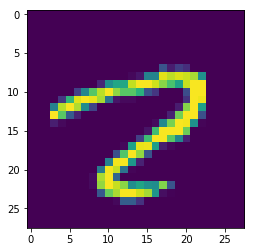

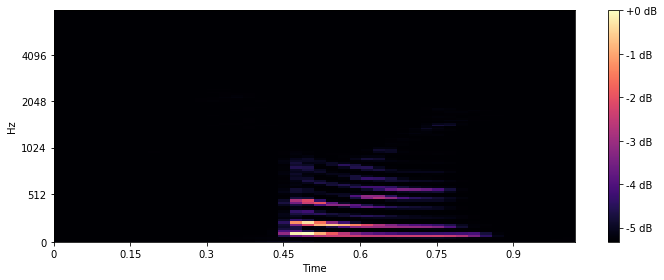

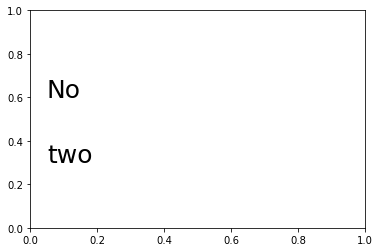

In [33]:

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

def plotNormalizedSpectrogram(normalizedSpecto):
    plt.figure(figsize=(10, 4))
    spectrogramData = normalizedSpecto
    librosa.display.specshow(librosa.power_to_db(spectrogramData, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    
def plotDescription(dispText):
    plt.figure()    
    ax = plt.subplot(111)
    textArr = dispText.split(' ')
    lenTextMid = int(len(textArr) / 2)
    t = plt.text(0.05, 0.6, ' '.join(textArr[0:lenTextMid]), transform=ax.transAxes, fontsize=25)
    t = plt.text(0.05, 0.3, ' '.join(textArr[lenTextMid:lenTextMid*2]), transform=ax.transAxes, fontsize=25)
    plt.show()    
    
def displaySample(predict, dataSet, wrongPred):
    
    n = wrongPred[0]
    gn_predict = wrongPred[1]

    AC_predict = np.argmax(predict[n][0])
    IC_predict = np.argmax(predict[n][1])
    TC_predict = np.argmax(predict[n][2])

    
    audio = np.reshape(dataSet[0][n], [128,44 ])
    image = dataSet[1][n]
    text = dataSet[2][n]
    real_label = dataSet[4][n]

    print("Showing sample number",n)
    print("Prediction - GN",gn_predict,"AC",AC_predict, "IC",IC_predict, "TC",TC_predict)
    print("Real label",real_label)
    digImg = gen_image(image)
    plotNormalizedSpectrogram(audio)
    plotDescription(text)

_, validationSet = loadData_ThreeModal("0.9","0.9","0.9")
    

correct_index = correct_samples[70] 
incorrect_index = incorrect_samples[17] # 0, 13, 17, 24

#displaySample(validationSet,Display_Validation_Data,correct_index)
displaySample(validationSet,Display_Validation_Data,incorrect_index)


In [28]:
AC_wrong, IC_wrong, TC_wrong, GN_wrong, GN_right = 0,0,0,0,0
c = 0
for i in range(len(incorrect_samples)):
    nsample = incorrect_samples[i][0] # index, 1 is gn prediction
    gn_predict = incorrect_samples[i][1] 
    
    correct_label = np.argmax(validationSet[nsample][3])
    AC_predict = np.argmax(validationSet[nsample][0])
    IC_predict = np.argmax(validationSet[nsample][1])
    TC_predict = np.argmax(validationSet[nsample][1])
    
    if(AC_predict != correct_label and IC_predict != correct_label and TC_predict != correct_label):
        c += 1 #print(nsample)
        print(i)
    else:
        if (AC_predict != correct_label):
            AC_wrong += 1
        if (IC_predict != correct_label):
            IC_wrong += 1
        if (TC_predict != correct_label):
            TC_wrong += 1
    
    if(AC_predict == correct_label and IC_predict == correct_label and TC_predict == correct_label):
        GN_wrong += 1
        
for i in range(len(correct_samples)):
    nsample = correct_samples[i][0] # index, 1 is gn prediction
    gn_predict = correct_samples[i][1] 
    
    correct_label = np.argmax(validationSet[nsample][2])
    AC_predict = np.argmax(validationSet[nsample][0])
    IC_predict = np.argmax(validationSet[nsample][1])
    
    if(AC_predict != correct_label and IC_predict != correct_label and TC_predict == correct_label):
        if(gn_predict == correct_label):
            GN_right += 1

print("No one correct",c, "(","{:2f}".format((c/len(incorrect_samples))*100),"of all incorrect samples)") 
print("GN had",GN_right,"when all AC/IC/TC were incorrect but",GN_wrong,"wrong when AC/IC/TC were correct")
print("AC had",AC_wrong, "IC had",IC_wrong,"wrong and TC had" , TC_wrong,"wrong")


0
13
17
24
No one correct 4 ( 13.333333 of all incorrect samples)
GN had 0 when all AC/IC/TC were incorrect but 0 wrong when AC/IC/TC were correct
AC had 24 IC had 2 wrong and TC had 2 wrong


In [16]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc


### https://hackernoon.com/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a
### SKOÐA Macro based for multiclass

def plotROC_Curve(ground_truth, prediction, zoom_range):
    lw = 2
    
    y_score = np.eye(10)[[row[5] for row in ground_truth]]
    y_test = np.eye(10)[[row for row in prediction]]

    
    n_classes = len(y_test[0])
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_test.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, zoom_range)
    plt.ylim(1-zoom_range, 1)
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    """colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    """
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
plotROC_Curve(validHold, y_pred_10_svc, 0.05)


NameError: name 'validHold' is not defined

In [ ]:
### ENSEMBLE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#import xgboost as xgb



In [ ]:
### helper function ###
def print_score(clf, X_train, y_train, X_test, y_test):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))   